# Breast Cancer Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
outcome                    0
dtype: int64

In [5]:
df.outcome.unique()

array([1, 0], dtype=int64)

### This means it is a binary classification problem

### Separate predictors and target

In [6]:
X = df.iloc[:,:-1]
y = df.outcome

### train test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=35)

# Train the model

In [27]:
model = LogisticRegression(max_iter=3000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

# Evaluate the model

r2 score does not work for categorical data 
here we shall use accuracy score

In [28]:
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test)

accuracy_score(y_test, y_predict)

0.9649122807017544

# Confusion Matrix

Alone accuracy score cannot be trusted so it needs to be ensambled with confusion matrix 

#### Here we shall treat class 1 as positive for our first analysis

so the confusion matrix is prepared based on that as follows:

it uses pd.crosstab(test_values, predicted_values) method

so the method to read confusion matrix given below would be using 

The following

|                      | confusion matrix  |                   |
|----------------------|-------------------|-------------------|
| _Taking 1 as positive_ | __class 0 Predicted__ | __Class 1 Predicted__ |
| __class 0 test__         | True Negative     | False Positive    |
| __class 1 test__         | False Negative    | True Positive     |

In [29]:
pd.crosstab(y_test, y_predict)

col_0,0,1
outcome,,
0,73,0
1,4,37


<AxesSubplot:xlabel='col_0', ylabel='outcome'>

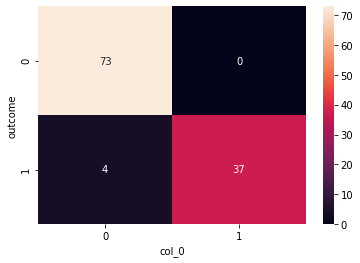

In [32]:
sns.heatmap(pd.crosstab(y_test, y_predict), annot=True)

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)



array([[73,  0],
       [ 4, 37]], dtype=int64)

# Precision and Recall

- __Precision = True Positive / True Positive + False Positive__
- Precision -> What ratio of positive identification is correct

- __Recall = True Positive / True Positive + False Negative__
- Recall -> Out of all the the actual positives how many were correctly classified as positives i.e. ratio of actual positives


##### here in our example

- precision = 37 we true positive and 0 were false positive = 37/37 = 1 so prescision is 1
- Recall = 37 we true positive and 4 were false negative = 37/41 = 0.902 is our recall

#### _REMEMBER:_ Here we are treating class 1 as positive for our first analysis as mentioned above

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        73
           1       1.00      0.90      0.95        41

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



If our recall score is 1 that means we do not have any false negative

and if precision is 1 that means we do not have any false positive

It depends on dataset as to which value is more important i.e. false negative or false positive as in out data set for cancer detection we do not want any false negative as that can be result in fatal repercussions and hence we focus on recall and make sure that recall is 1.

Lets say we are determining which astronomer is good fit to be an astronaut to go to space and here we do not want any false positive as we dont want any unfit person to go to space and hence we make sure that our prescision is 1

#### F1_score

your f1 score is calculated as follows 

it is just a combination of precision and recall and can be calculated as below

__f1_score = 2 * (precision x recall)/(precision + recall)__

f1_score is the harmonic mean of precision and recall

if precision and recall both are 1 then and only then your f1 score is 1

#### Now what would be the confusion matrix when we treat our class 0 as positive

here the whole confusion matrix will topple as below

|                      | confusion matrix  |                   |
|----------------------|-------------------|-------------------|
| _Taking 0 as positive_ | __class 0 Predicted__ | __Class 1 Predicted__ |
| __class 0 test__         | True Positive   | False Negative    |
| __class 1 test__         | False Positive    | True Negative     |

#### Now lets calculate the precision recall and f1 score of 0